# Preparando os dados

In [1]:
from os import environ
environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
import numpy as np
from tensorflow import keras
from TensorflowUtils.misc import get_model
from TensorflowUtils.DataUtils import generate_square_mask
from TensorflowUtils.VisualTools import print_samples

from KerasGAN.CustomModels import WGAN
from KerasGAN.losses import w_dist

from ImageMetrics.metrics import SSIM, PSNRB, SSIM3
from ImageMetrics.losses import L3SSIM, LPSNRB, LSSIM

import sys
sys.path.insert(1, '/home/apeterson056/AutoEncoder/codigoGitHub/IC-AutoEncoder/modules') 
from DataMod import DataSet

In [2]:
data_set = DataSet().load_rafael_cifar_10_noise_data()

mask1 = np.array([generate_square_mask((64, 64, 1), 15, 25) for _ in range(50_000)])
data = np.array(np.array([data_set.x_train*mask1, data_set.y_train]))/255
data_test = np.array(np.array([data_set.x_test*mask1[:10_000], data_set.y_test]))/255

In [3]:
generator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)
discriminator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)

discriminator = get_model(model_json_name = "D-Teste1.json")
generator = get_model(model_json_name = "G-AutoEncoder-0.0-64x64.json")
wgan = WGAN(discriminator = discriminator, generator=generator)

wgan.compile(
    d_optimizer=discriminator_optimizer,
    g_optimizer=generator_optimizer,
    min_max_loss=w_dist,
    g_losses = [LSSIM(),LPSNRB()],
    g_losses_weights = [5, 0.05],
    g_metrics = [SSIM()]
)

In [5]:
wgan.fit(x = data[0], y = data[1], batch_size=25, epochs=8)

Epoch 1/8
2000/2000 [==============================] - 374s 153ms/step - w_dist: 4.2990 - gp: 0.0619 - LSSIM: 0.7404 - LPSNRB: -61.5189 - SSIM: 0.2596
Epoch 2/8
2000/2000 [==============================] - 332s 166ms/step - w_dist: 2.5450 - gp: 0.1085 - LSSIM: 0.6360 - LPSNRB: -63.1740 - SSIM: 0.3640
Epoch 3/8
2000/2000 [==============================] - 328s 164ms/step - w_dist: -4.6046 - gp: 0.2875 - LSSIM: 0.5351 - LPSNRB: -64.4709 - SSIM: 0.4649
Epoch 4/8
2000/2000 [==============================] - 327s 163ms/step - w_dist: -2.8938 - gp: 0.2952 - LSSIM: 0.4667 - LPSNRB: -65.2358 - SSIM: 0.5333
Epoch 5/8
2000/2000 [==============================] - 330s 165ms/step - w_dist: -1.5465 - gp: 0.0502 - LSSIM: 0.4190 - LPSNRB: -66.2107 - SSIM: 0.5810
Epoch 6/8
2000/2000 [==============================] - 329s 165ms/step - w_dist: -1.3614 - gp: 0.0556 - LSSIM: 0.3908 - LPSNRB: -66.6487 - SSIM: 0.6092
Epoch 7/8
2000/2000 [==============================] - 328s 164ms/step - w_dist: 5.8497 - 

In [8]:
y_generated = wgan.generator.predict(data_test[0])

(16, 4.8)


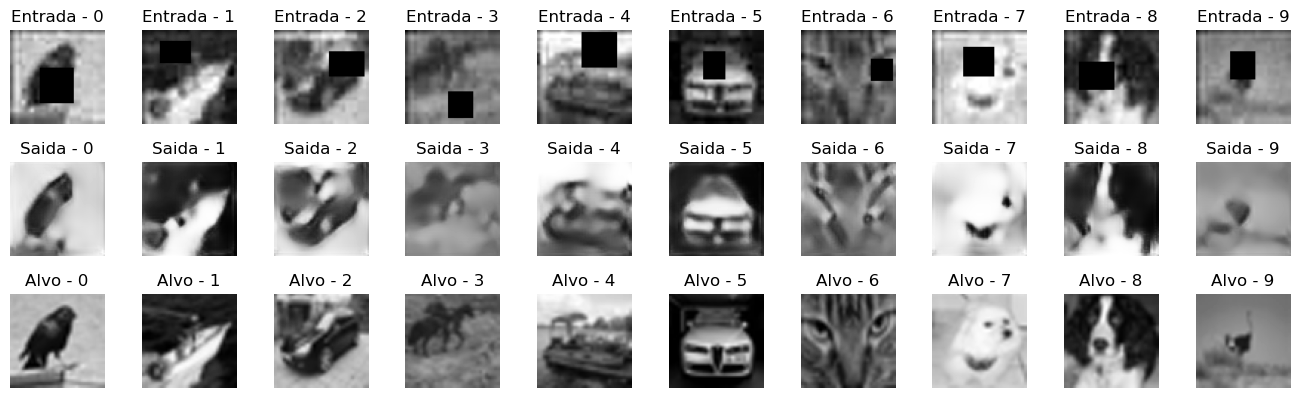

In [17]:
rng = np.random.default_rng(123452)
samples = rng.randint(size = [10], low = 0, high = 10_000)
plot_samples = np.array([data_test[0][samples], y_generated[samples], data_test[1][samples]])
print_samples(plot_samples, line_labels = ["Entrada", "Saida", "Alvo"])

In [6]:
generator = get_model(model_json_name = "G-AutoEncoder-0.0-64x64.json")
generator.compile(optimizer=generator_optimizer,
                  loss=LSSIM())

In [13]:
generator.fit(x = data[0], y = data[1], batch_size=25, epochs=25)

Epoch 1/25
2000/2000 [==============================] - 28s 14ms/step - loss: 0.1739
Epoch 2/25
2000/2000 [==============================] - 29s 14ms/step - loss: 0.1727
Epoch 3/25
2000/2000 [==============================] - 29s 15ms/step - loss: 0.1716
Epoch 4/25
2000/2000 [==============================] - 30s 15ms/step - loss: 0.1706
Epoch 5/25
2000/2000 [==============================] - 30s 15ms/step - loss: 0.1697
Epoch 6/25
2000/2000 [==============================] - 30s 15ms/step - loss: 0.1690
Epoch 7/25
2000/2000 [==============================] - 30s 15ms/step - loss: 0.1682
Epoch 8/25
2000/2000 [==============================] - 30s 15ms/step - loss: 0.1675
Epoch 9/25
2000/2000 [==============================] - 30s 15ms/step - loss: 0.1668
Epoch 10/25
2000/2000 [==============================] - 30s 15ms/step - loss: 0.1662
Epoch 11/25
2000/2000 [==============================] - 30s 15ms/step - loss: 0.1656
Epoch 12/25
2000/2000 [==============================] - 30s 15

(16, 4.8)


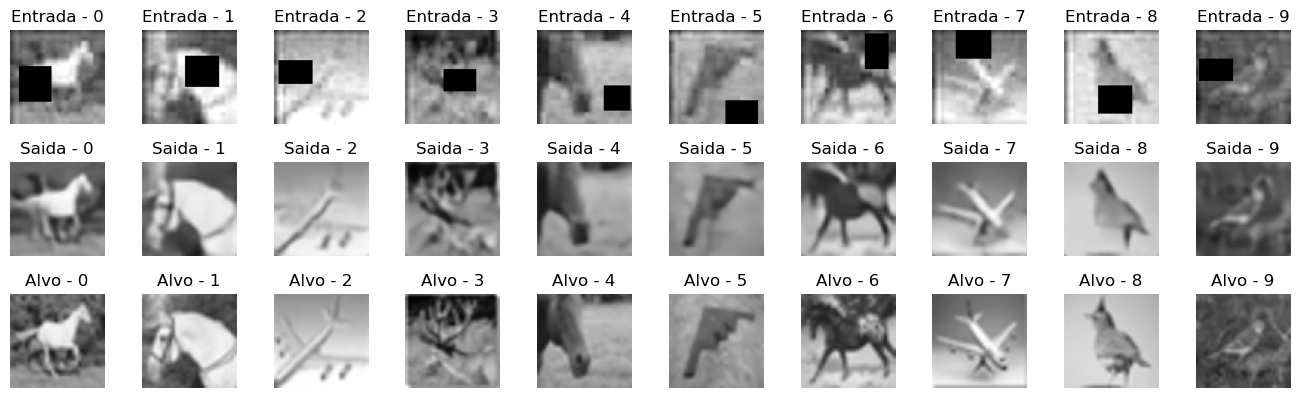

In [15]:
rng = np.random.default_rng(123452)
samples = np.random.randint(size = [10], low = 0, high = 10_000)
y_generated = generator.predict(data_test[0][samples])
plot_samples = np.array([data_test[0][samples], y_generated, data_test[1][samples]])
print_samples(plot_samples, line_labels = ["Entrada", "Saida", "Alvo"])